Импортированы нужные библиотеки

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns

Читаем файл с датасетом и выводим на экран

In [59]:
df = pd.read_csv("S02-hw-dataset.csv")
df.head(len(df))

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


Статистика для всех колонок

In [60]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


Выводим количество строк и типы данных

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


Показывает долю пропущенных значений в колонках

In [62]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Выводит строки там, где отрицательная сумма покупки, айди, возраст меньше трудоспособного и больше максимального на сегодняшний день, значение пустое в любой колонке, содержатся дубликаты, а также отсутствие дохода, когда была осуществена покупка

In [63]:
df[(df["purchases"] < 0) | (df["user_id"] < 0) | (df["age"] < 14) | (df["age"] > 122) | (df.isna().any(axis=1)) | (df.duplicated()) | ((df["purchases"] > 0) & (df["revenue"] <= 0))]

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
10,11,24.0,US,4,0
12,13,NaN,US,9,630
20,21,5.0,RU,8,1488
40,10,24.0,RU,7,511


Вывод новой таблицы с корректными значениями и её сохранение для дальнейшей работы

In [64]:
data = df[~((df["purchases"] < 0) | (df["user_id"] < 0) | (df["age"] < 14) | (df["age"] > 130) | (df.isna().any(axis=1)) | (df.duplicated()) | ((df["purchases"] > 0) & (df["revenue"] <= 0)))]
dataframe=data
data.head(len(data))

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511
11,12,20.0,CN,7,1652
13,14,36.0,DE,9,2358


Вывод информации о новой таблице

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 39
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    35 non-null     int64  
 1   age        35 non-null     float64
 2   country    35 non-null     object 
 3   purchases  35 non-null     int64  
 4   revenue    35 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.6+ KB


Группирует данные по стране и считает количество строк, в которых есть та или иная страна

In [66]:
data.groupby("country").size()

country
CN     2
DE     5
FR    11
RU    11
US     6
dtype: int64

Группировка с агрегатами

По данным показателям лидирует Россия и Франция. По средним значениям разница между некоторыми странами весомая. Неожиданного эффекта нет, если данные расчитаны на оценку определённой группы, а если на основе этих данных оценивают страны, то данные отличаются от реальности

In [67]:
result = data.groupby("country").agg({
    "age": ["mean", "max"],
    "purchases": ["sum", "max"],
    "revenue": ["sum", "mean"],
    "user_id": ["count", "min"]
})
result.columns = [
    "Avg age", "Max age",
    "Sum purchases", "Max purchases",
    "Sum avenue", "Avg avenue",
    "Count ID", "Min ID"
]
print(result)

           Avg age  Max age  Sum purchases  Max purchases  Sum avenue  \
country                                                                 
CN       24.000000     28.0              9              7        2108   
DE       34.600000     52.0             33             11        7377   
FR       39.545455     57.0             52              7        7326   
RU       32.909091     54.0             47              7        8272   
US       38.833333     51.0             24              5        3829   

          Avg avenue  Count ID  Min ID  
country                                 
CN       1054.000000         2       8  
DE       1475.400000         5      14  
FR        666.000000        11       1  
RU        752.000000        11       2  
US        638.166667         6       9  


Гистограмма среднего возраста по странам

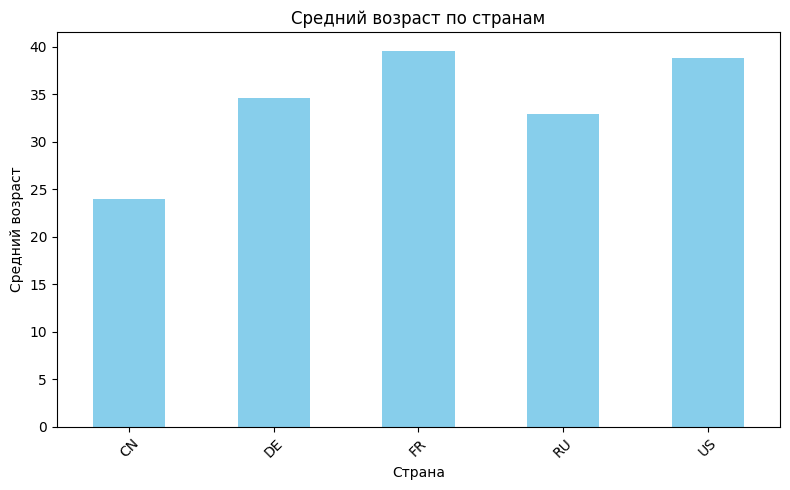

In [68]:
avg_age_by_country = data.groupby('country')['age'].mean()

plt.figure(figsize=(8, 5))
avg_age_by_country.plot(kind='bar', color='skyblue')

plt.title('Средний возраст по странам')
plt.xlabel('Страна')
plt.ylabel('Средний возраст')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/histogram.png')
plt.show()

Ящики с усами распределения доходов по странам

C:\Users\koshk\AppData\Local\Temp\ipykernel_10952\3260845048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data, x="country", y="revenue", palette="Set2")


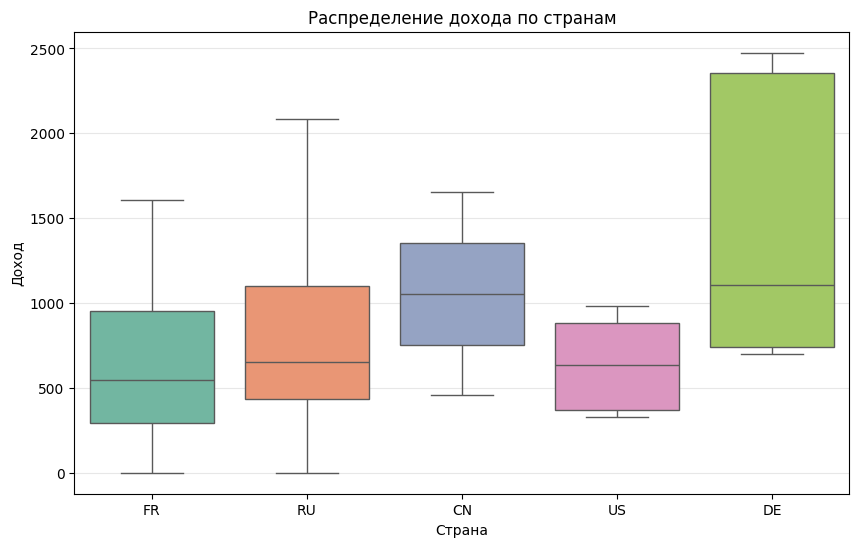

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(data, x="country", y="revenue", palette="Set2")
plt.title("Распределение дохода по странам")
plt.xlabel("Страна")
plt.ylabel("Доход")
plt.grid(axis="y", alpha=0.3)
plt.savefig('figures/boxplot.png')
plt.show()

Диаграмма рассеяния покупок против доходов

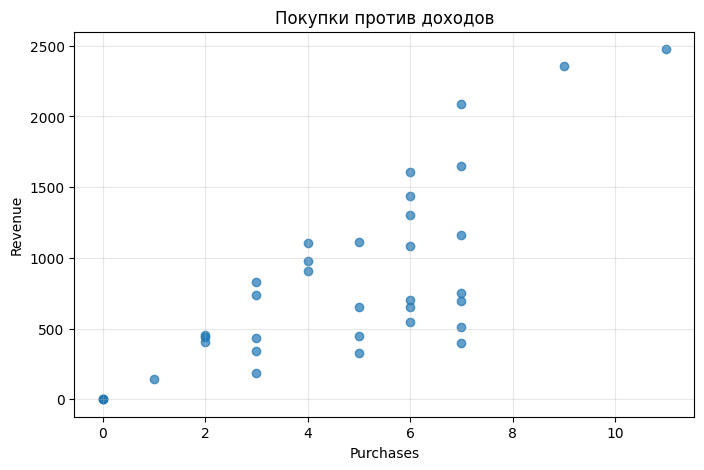

In [70]:
plt.figure(figsize=(8, 5))
plt.scatter(data['purchases'], data['revenue'], alpha=0.7)
plt.title('Покупки против доходов')
plt.xlabel('Purchases')
plt.ylabel('Revenue')
plt.grid(True, alpha=0.3)
plt.savefig('figures/scatte.png')
plt.show()